In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 

In [41]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([100,130,2,120])
data=np.concatenate([data,outliers])

In [42]:
df=pd.DataFrame(data,columns=['Values'])
print(df.head())

      Values
0  54.967142
1  48.617357
2  56.476885
3  65.230299
4  47.658466


In [43]:
print(df.tail())

         Values
99    47.654129
100  100.000000
101  130.000000
102    2.000000
103  120.000000


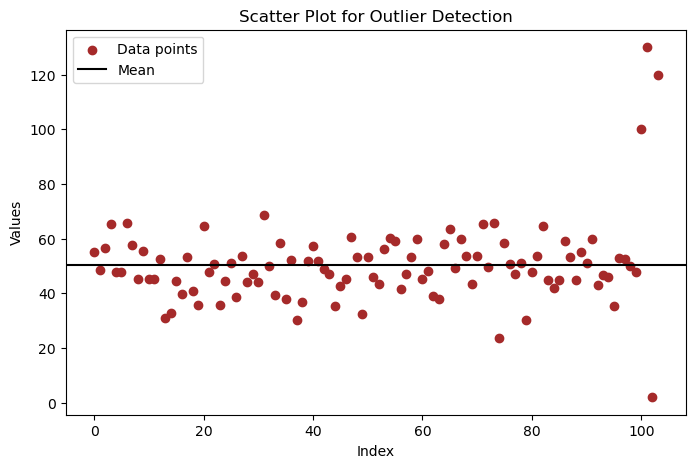

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='brown',label='Data points')
plt.axhline(y=df['Values'].mean(),color='black',linestyle='-',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter Plot for Outlier Detection")
plt.legend()
plt.show()

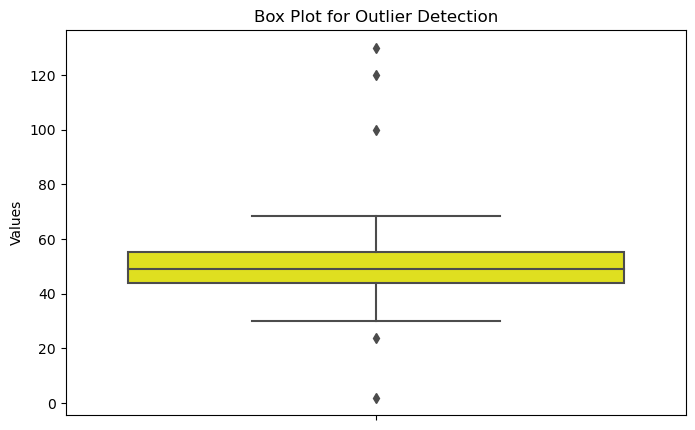

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values',color="yellow")
plt.title("Box Plot for Outlier Detection")
plt.show()

In [46]:
df['Z-score'] = zscore(df['Values'])
df['Outlier_Z'] = df['Z-score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')
print(df[df['Outlier_Z']=='Outlier'])

     Values   Z-score Outlier_Z
100   100.0  3.237086   Outlier
101   130.0  5.197492   Outlier
102     2.0 -3.166905   Outlier
103   120.0  4.544023   Outlier


In [47]:
Q1 = df['Values'].quantile(0.25)
Q3 = df['Values'].quantile(0.75)
IQR = Q3 - Q1

#Defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identifying outliers
df['Outlier_IQR'] = df['Values'].apply(lambda x: 'Outlier' if (x < lower_bound or x > upper_bound) else 'Normal')

print(df[df['Outlier_IQR'] == 'Outlier'])

         Values   Z-score Outlier_Z Outlier_IQR
74    23.802549 -1.742178    Normal     Outlier
100  100.000000  3.237086   Outlier     Outlier
101  130.000000  5.197492   Outlier     Outlier
102    2.000000 -3.166905   Outlier     Outlier
103  120.000000  4.544023   Outlier     Outlier


**Finding Outliers Using the IQR Method with a 5-Number Summary**

The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.
 
    
The Interquartile Range (IQR) is calculated as:
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.
 
    
**Let's generate a dataset, compute the 5-number summary, and find the outliers using the IQR**


In [49]:
#step 1:create a dataset
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([100,130,2,120])
data=np.concatenate([data,outliers])

#step 2:Compute the 5-Number summary
Q1 = np.percentile(data,25)
Q2 = np.median(data)
Q3 = np.percentile(data,75)
min_val = np.min(data)
max_val = np.max(data)

#step 3:Compute IQR
IQR = Q3 - Q1

#step 4:Comp[ute Outlier Boundaries]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#step 5:Find Outliers
outliers=data[(data<lower_bound) | (data > upper_bound)]

#step 6:Print Results
print(f"5-Number Summary:\nMin: {min_val},Q1: {Q1}, Median (Q2): {Q2}, Q3: {Q3}, Max: {max_val}")
print(f"IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers}")

5-Number Summary:
Min: 2.0,Q1: 43.99094329503547, Median (Q2): 49.061707980157124, Q3: 55.20590585731508, Max: 130.0
IQR: 11.21496256227961
Lower Bound: 27.168499451616057, Upper Bound: 72.0283497007345
Outliers: [ 23.80254896 100.         130.           2.         120.        ]
